In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime
from cartopy import crs as ccrs

In [8]:
def read_data(root_folder,csv_file):
    df = pd.read_csv(f'{root_folder}/csv/{csv_file}') 
    df = df[df['on_ground'] == False] #Excluding Taxiing Aircraft
    df['x_speed'] = np.sin(np.deg2rad(df['true_track']))*df['velocity']
    df['y_speed'] = np.cos(np.deg2rad(df['true_track']))*df['velocity']
    aircraft = [(x,y,vx,vy,country) for x,y,vx,vy,country in zip(df['longitude'],df['latitude'],df['x_speed'],df['y_speed'],df['origin_country'])]
    return aircraft

In [23]:
def plot_us_aircraft(root_folder,aircraft,timestamp):
    # Plotting Positional Data For United States
    datetime_str = datetime.strptime(timestamp,'%Y-%m-%dT%H:%M:%S')
    plt.figure(figsize =(15,9),num=1,clear=True)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.stock_img()
    ax.set_extent([-128, -65, 22, 52], crs=ccrs.PlateCarree())
    ax.set_title(f'OpenSky API | Aircraft Tracking - US Region - {datetime_str}',loc='left', fontsize=10)

    legend_handle = [
        Line2D([0],[0], color='black', lw=3, label='US Aircraft'),
        Line2D([0],[0], color='red', lw=3, label='Non-US Aircraft'),
    ]

    for x, y, vx, vy,country in aircraft:
        if country == 'United States':
            color='black'
        else:
            color='red'
        plt.quiver(
            x, y, vx, vy, 
            transform=ccrs.PlateCarree(), 
            headwidth=10,
            headaxislength=5,
            headlength=8,
            width=0.0025,
            scale=35000,
            color=color
        )
    ax.text(x=0.9955,y=0.0095, s='Created by Filip Livancic', transform=ax.transAxes, bbox=dict(facecolor='white',alpha=0.85), va='bottom',ha='right', fontsize=9)
    ax.legend(handles=legend_handle,loc='upper right', title_fontsize=9,fontsize=8)
    plt.savefig(
        f'{root_folder}/images/us/{timestamp}.png', dpi=150
    )

In [26]:
def plot_eu_aircraft(root_folder,aircraft,timestamp):
    # Plotting Positional Data For Europe
    plt.figure(figsize =(15,9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.stock_img()
    ax.set_extent([-15,30,35,60], crs=ccrs.PlateCarree())
    ax.set_title(f'OpenSky API | Aircraft Tracking - EU Region - {datetime_str}',loc='left', fontsize=10)

    for x, y, vx, vy,country in aircraft:
        plt.quiver(
            x, y, vx, vy, 
            transform=ccrs.PlateCarree(), 
            headwidth=10,
            headaxislength=7,
            headlength=9,
            width=0.001,
            scale=20000,
            color='black'
        )
    ax.text(x=0.9955,y=0.0085, s='Created by Filip Livancic', transform=ax.transAxes, bbox=dict(facecolor='white',alpha=0.85), va='bottom',ha='right', fontsize=9)
    plt.savefig(
        f'{root_folder}/images/eu/{timestamp}.png', dpi=150
    )

[(-77.2857, 42.9245, 67.90527560343463, 4.117577591446925, 'United States'), (7.1948, 47.4927, -211.9515229110835, 12.332397807095662, 'Switzerland'), (-102.1638, 32.4142, 14.400907522094842, -55.56414187711416, 'United States'), (-86.1838, 35.3999, 31.38165891918629, -33.4414575561511, 'United States'), (-75.425, -12.8708, 227.89369710284976, -52.48773590844412, 'Chile'), (-82.1425, 31.7753, 107.00036048875675, 203.71925523935164, 'United States'), (-118.3671, 33.939, -81.80035118812177, -10.798270486515253, 'United States'), (17.1849, 59.1319, 6.68427928280692, 63.27793699599757, 'Sweden'), (-97.5667, 33.7265, 47.32284994288696, -153.82532780164325, 'United States'), (-114.3234, 36.3356, -122.945842360562, -97.23621931282518, 'United States'), (79.8684, 27.1518, 184.6909470450352, -77.67485873568108, 'India'), (140.2322, 35.0382, -136.3194531755588, -72.5433876098754, 'Japan'), (-88.9326, 48.7001, 50.421998233142794, 80.2550340737386, 'Canada'), (100.938, 15.2257, -142.50444246444485

TypeError: Input z must be 2D, not 0D

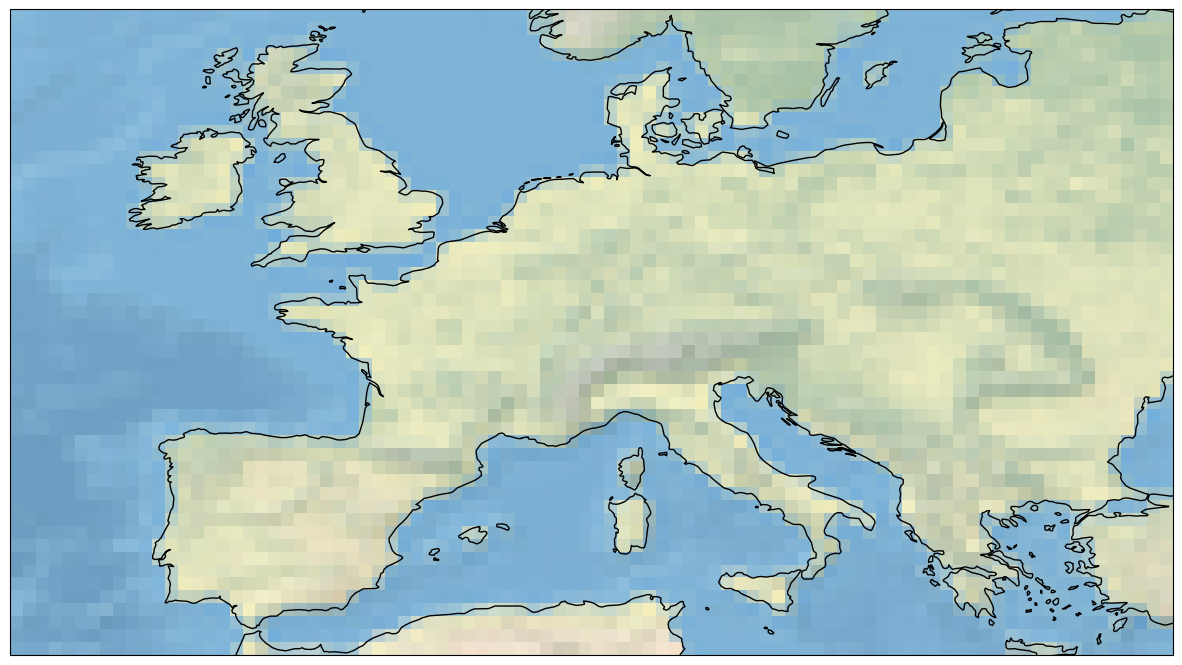

In [11]:
timestamp = file_list[1][0]
csv_file = file_list[1][1]
aircraft = read_data(root_folder,csv_file)
print(aircraft)
# NEEDS SOME KIND OF MESH GRID TO PLOT AGAINST IN ORDER TO DO CONTOURS
plt.figure(figsize =(15,9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent([-15,30,35,60], crs=ccrs.PlateCarree())

for x, y, vx, vy,country in aircraft:
    plt.contourf(
        x, y, z, 
        transform=ccrs.PlateCarree()
    )

In [2]:
# Creating List of Files To Loop Through
date_selection = '2024-04-28'
root_folder = f'{os.path.dirname(sys.path[0])}/data/get_states/{date_selection}'
file_list = []
for csv_file in os.listdir(f'{root_folder}/csv'):
    if '.csv' in csv_file:
        timestamp = csv_file.split('.')[0]
        file_list.append((timestamp,csv_file))

Creating Image from: 2024-04-28T14:01:18.348624.csv
Creating Image from: 2024-04-28T14:02:19.246206.csv
Creating Image from: 2024-04-28T14:35:47.860410.csv
Creating Image from: 2024-04-28T14:44:55.827444.csv
Creating Image from: 2024-04-28T14:00:17.462307.csv
Creating Image from: 2024-04-28T14:06:22.760927.csv
Creating Image from: 2024-04-28T13:48:07.294005.csv
Creating Image from: 2024-04-28T14:21:35.788155.csv
Creating Image from: 2024-04-28T14:15:30.344542.csv
Creating Image from: 2024-04-28T14:24:38.293371.csv
Creating Image from: 2024-04-28T14:33:46.186525.csv
Creating Image from: 2024-04-28T14:22:36.547297.csv
Creating Image from: 2024-04-28T14:56:05.667282.csv
Creating Image from: 2024-04-28T13:53:11.378434.csv
Creating Image from: 2024-04-28T14:10:26.232815.csv
Creating Image from: 2024-04-28T14:51:01.092827.csv
Creating Image from: 2024-04-28T14:43:54.942421.csv
Creating Image from: 2024-04-28T14:19:34.012285.csv
Creating Image from: 2024-04-28T14:18:33.030169.csv
Creating Ima

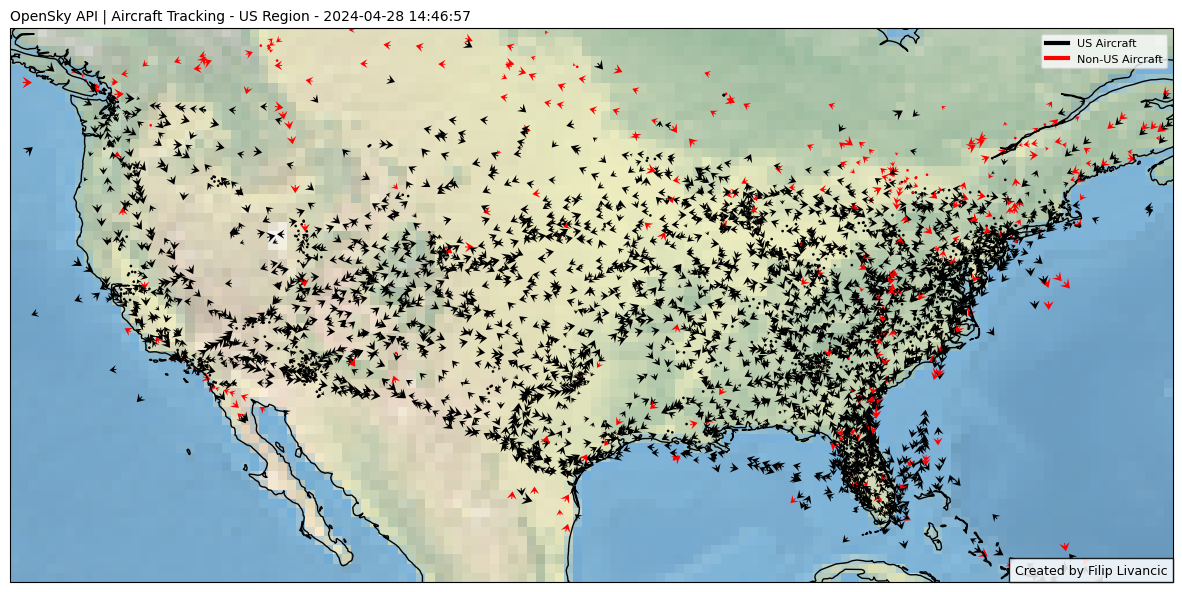

In [25]:
for obj in file_list:
    timestamp = obj[0]
    csv_file = obj[1]
    print(f'Creating Image from: {csv_file}')
    aircraft = read_data(root_folder,csv_file)
    plot_us_aircraft(root_folder,aircraft,timestamp)